## EDA 및 전처리

### EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'blue'
plt.rcParams['axes.grid'] = True

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
print(f"shape of train: {train.shape}")
display(train)
print(f"shape of test: {test.shape}")
display(test)

shape of train: (1108, 21)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
id,,,,,,,,,,,,,,,,,,,,,
0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1956,Graduation,Together,46097.0,0,1,31-03-2013,11,5,3,1,6,4,0,0,0,0,0,0,0,241
1104,1986,Graduation,Married,23477.0,1,0,21-10-2013,39,3,3,0,4,8,0,0,0,0,0,0,0,147
1105,1975,Master,Married,37368.0,1,0,16-12-2013,4,1,1,0,2,6,1,0,0,0,0,0,0,30


shape of test: (1108, 20)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
id,,,,,,,,,,,,,,,,,,,,
0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,4,3,8,4,0,0,0,0,0,0,0
1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,2,4,10,1,0,0,0,0,0,1,0
2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,5,3,13,4,0,0,0,0,0,0,0
3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,7,4,13,5,0,1,0,0,0,0,0
4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,6,7,9,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1952,Graduation,Married,35704.0,1,1,03-01-2014,54,3,2,0,4,4,0,0,0,0,0,0,0
1104,1969,Master,Together,35924.0,1,1,23-03-2014,56,1,1,0,3,5,0,0,0,0,0,0,0
1105,1989,PhD,Single,33996.0,0,0,11-09-2013,46,1,1,1,3,4,0,0,0,0,0,0,0


In [5]:
# 결측치가 없음을 확인
print("TRAIN")
display(train.isnull().sum())
print("TEST")
display(test.isnull().sum())

TRAIN


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

TEST


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

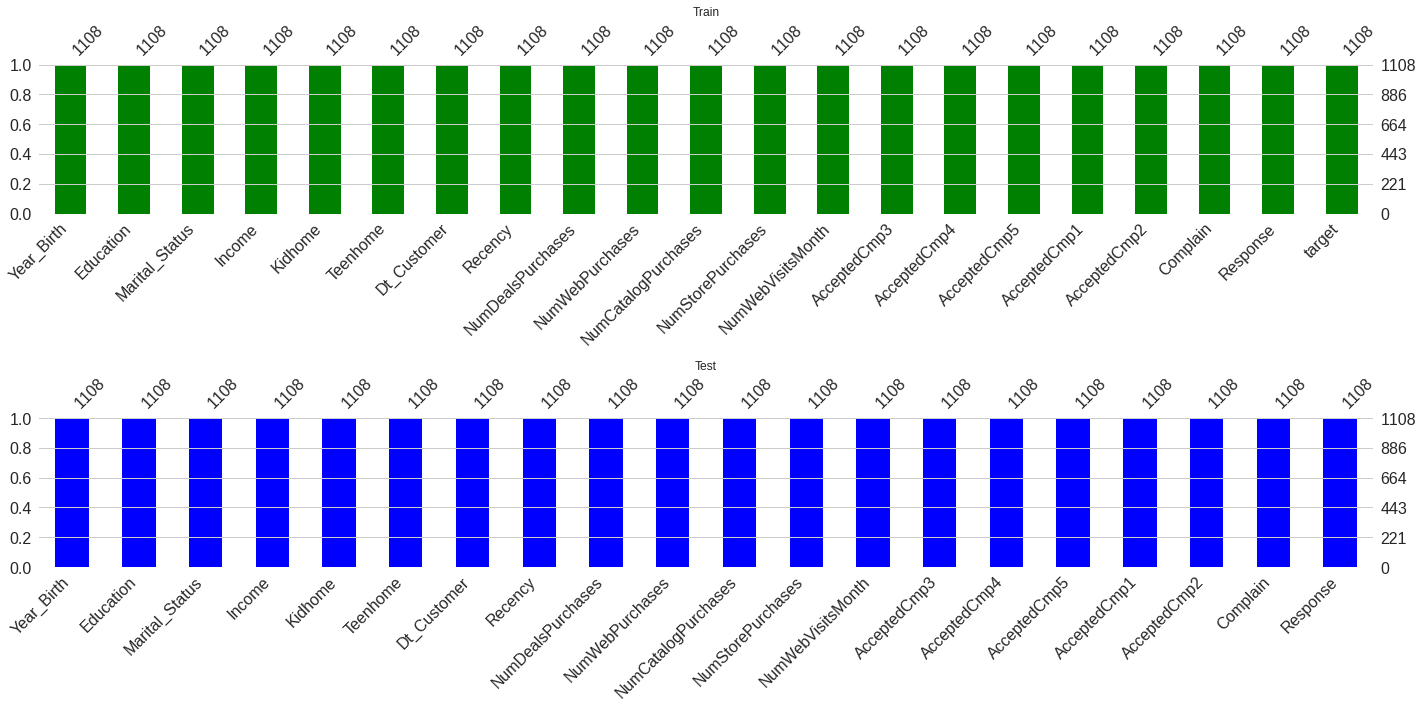

In [6]:
fig, axes = plt.subplots(nrows=2, figsize=(20,10))

msno.bar(train, color='green', ax=axes[0])
axes[0].set_title('Train')

msno.bar(test, color='blue', ax=axes[1])
axes[1].set_title("Test")

fig.tight_layout()

In [7]:
# Martial_Status, Education, Dt_Customer를 제외하면 모두 수치형 변수이다
print("TRAIN")
display(train.info())
print("TEST")
display(test.info())

TRAIN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Dt_Customer          1108 non-null   object 
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-nu

None

TEST
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1108 non-null   int64  
 1   Education            1108 non-null   object 
 2   Marital_Status       1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Teenhome             1108 non-null   int64  
 6   Dt_Customer          1108 non-null   object 
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-nul

None

In [8]:
train.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [9]:
# train set의 수치형 변수들과 어느 정도 비슷한 분포를 지니는 것 같다
test.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,1968.939531,52418.693141,0.453971,0.499097,47.869134,2.307762,3.986462,2.651625,5.696751,5.289711,0.077617,0.062274,0.074007,0.059567,0.011733,0.009928,0.158845
std,11.745146,28526.498074,0.528033,0.536810,28.778160,1.904697,2.667140,3.056459,3.191864,2.446169,0.267689,0.241762,0.261901,0.236789,0.107730,0.099187,0.365696
min,1899.000000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.750000,34678.000000,0.000000,0.000000,23.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51171.500000,0.000000,0.000000,47.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68695.000000,1.000000,1.000000,72.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 범주형 변수 전처리(Year-Birth도 함께)

#### Year_Birth

In [10]:
# 나이로 바꿔주고, 원래 열을 삭제한다.
train['Age'] = train['Year_Birth'].apply(lambda x: 2022 - x)
test['Age'] = test['Year_Birth'].apply(lambda x: 2022 - x)

In [11]:
train.drop('Year_Birth', axis=1, inplace=True)
test.drop('Year_Birth', axis=1, inplace=True)

In [12]:
train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Age
id,,,,,,,,,,,,,,,,,,,,,
0,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541,48
1,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899,60
2,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901,71
3,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50,48
4,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444,76


#### Education

In [13]:
# Test set에서 Master, 2n Cycle, Basic의 수가 조금 더 많이 나타나기는 했지만 전체적으로 분포가 비슷한 것 같다.
print("TRAIN")
display(train['Education'].value_counts())
print("TEST")
display(test['Education'].value_counts())

TRAIN


Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

TEST


Graduation    546
PhD           227
Master        192
2n Cycle      111
Basic          32
Name: Education, dtype: int64

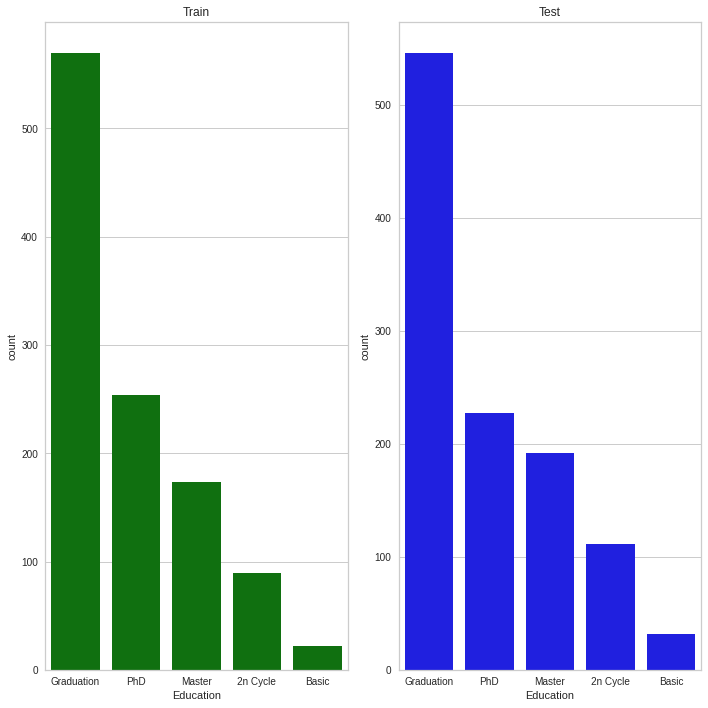

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10,10))
sns.countplot(x='Education', data=train, color='green', order=train['Education'].value_counts().index, ax=axes[0])
axes[0].set_title('Train')

sns.countplot(x='Education', data=test, color='blue', order=train['Education'].value_counts().index, ax=axes[1])
axes[1].set_title("Test")

fig.tight_layout()

In [15]:
# Education에 따라 위와 같은 순서로 지출이 나옴을 알 수 있음
# 그룹간에 확연한 차이가 존재함을 확인
education_groupby = train.groupby('Education')['target'].median().sort_values(ascending=False)
print(education_groupby)

Education
PhD           506.5
Master        415.0
Graduation    370.5
2n Cycle      341.0
Basic          57.5
Name: target, dtype: float64


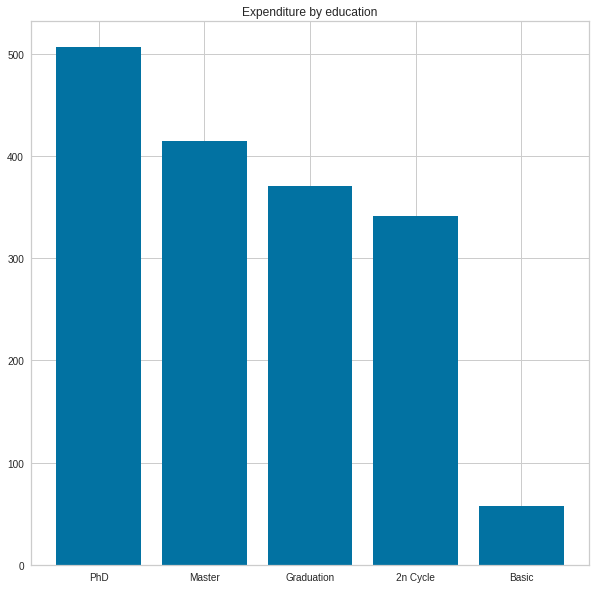

In [16]:
plt.bar(x=education_groupby.index, height=education_groupby)
plt.title("Expenditure by education")
plt.show()

In [17]:
map_class1 = {'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4}
train[['Education']] = train[['Education']].applymap(map_class1.get)
test[['Education']] = test[['Education']].applymap(map_class1.get)

#### Marital_Status

In [18]:
# 전체적으로 분포가 비슷한 것을 확인했다.그리고 Absurd, Alone, YOLO 같은 경우에는 그 값이 극도로 적음을 확인했다.
# 의미상 Single에 넣는 것이 가장 적합할 것 같으니 Single에 포함시키도록 한다
print("TRAIN")
display(train['Marital_Status'].value_counts())
print("TEST")
display(test['Marital_Status'].value_counts())

TRAIN


Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

TEST


Married     442
Together    277
Single      237
Divorced    112
Widow        37
Absurd        1
Alone         1
YOLO          1
Name: Marital_Status, dtype: int64

In [19]:
train[['Marital_Status']] = train[['Marital_Status']].replace(['Alone', 'YOLO', 'Absurd'], 'Single')
test[['Marital_Status']] = test[['Marital_Status']].replace(['Alone', 'YOLO', 'Absurd'], 'Single')

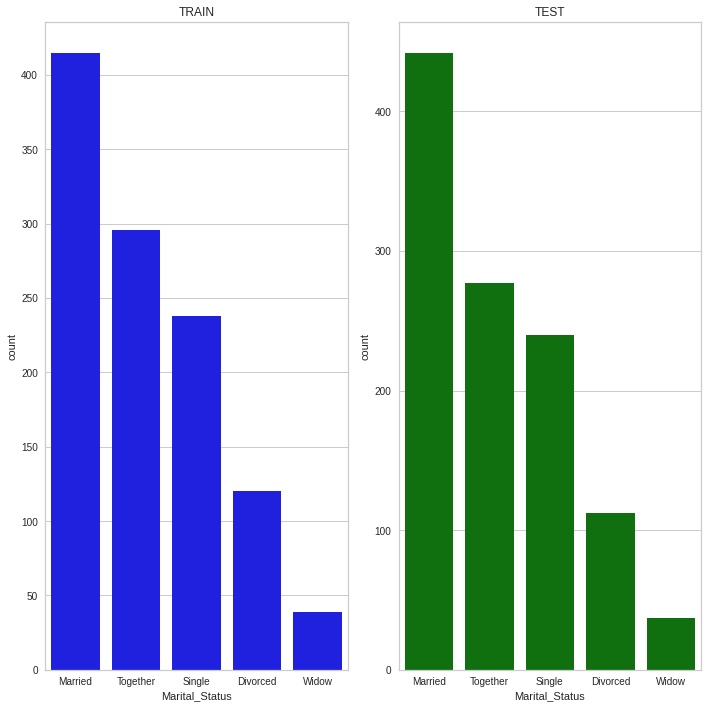

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(10,10))
sns.countplot(x='Marital_Status', data=train, color='blue', order=train.Marital_Status.value_counts().index, ax=axes[0])
axes[0].set_title('TRAIN')
sns.countplot(x='Marital_Status', data=test, color='green', order=train.Marital_Status.value_counts().index, ax=axes[1])
axes[1].set_title("TEST")
fig.tight_layout()

In [21]:
marital_status_groupby = train.groupby('Marital_Status')['target'].median().sort_values(ascending=False)
print(marital_status_groupby)

Marital_Status
Widow       606.0
Divorced    514.0
Married     410.0
Single      395.5
Together    379.0
Name: target, dtype: float64


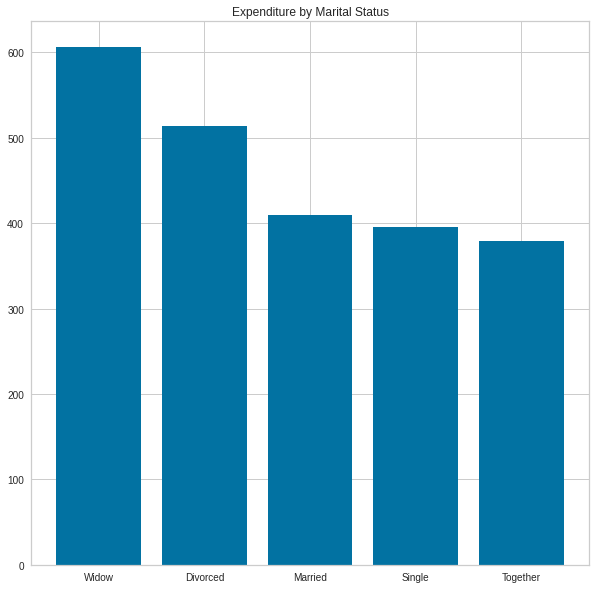

In [22]:
# window, divorced, 나머지그룹은 차이가 많이 나지만, Married, Single, Together은 큰 차이가 없는 것 처럼 보인다
# 그렇지만 일단 target value 순으로 label인코딩을 하도록 하자
plt.bar(x=marital_status_groupby.index, height=marital_status_groupby)
plt.title('Expenditure by Marital Status')
plt.show()

In [23]:
# 이번에는 함수를 만들어서 동일한 작업을 실행해 보도록 하자
train_df = train.copy()
def mapping_by_target_value(data, feature):
  groupby_feature = train_df.groupby(feature)['target'].median().sort_values(ascending=True)
  map_class = {}
  for i, j in enumerate(groupby_feature.index):
    map_class[j] = i
  data[[feature]] = data[[feature]].applymap(map_class.get)

In [24]:
mapping_by_target_value(train, 'Marital_Status')
mapping_by_target_value(test, 'Marital_Status')

In [25]:
test.Marital_Status

id
0       1
1       0
2       2
3       2
4       0
       ..
1103    2
1104    0
1105    1
1106    0
1107    1
Name: Marital_Status, Length: 1108, dtype: int64

#### Dt_Customer

In [26]:
# 날짜를 연, 월, 일로 분리해 각각의 칼럼을 만들어주고, 기존의 열은 삭제 하기로 한다.
train['Year'] = train['Dt_Customer'].str.split("-").str[2].astype('int')
train['Month'] = train['Dt_Customer'].str.split("-").str[1].astype('int')
train['Day'] = train['Dt_Customer'].str.split("-").str[0].astype('int')

test['Year'] = test['Dt_Customer'].str.split("-").str[2].astype('int')
test['Month'] = test['Dt_Customer'].str.split("-").str[1].astype('int')
test['Day'] = test['Dt_Customer'].str.split("-").str[0].astype('int')

In [27]:
train.drop('Dt_Customer', axis=1, inplace=True)
test.drop("Dt_Customer", axis=1, inplace=True)

In [28]:
train['Year'] = train['Year'].apply(lambda x : 2022-x)
test['Year'] = test['Year'].apply(lambda x: 2022-x)

In [29]:
# Groupby를 통해 확인해 본 결과, 연월일에 따라 target값이 달라진다는 것을 확인할 수 있다.
groupby_year = train.groupby("Year")['target'].median().sort_values(ascending=False)
groupby_month = train.groupby("Month")['target'].median().sort_values(ascending=False)
groupby_day = train.groupby("Day")['target'].median().sort_values(ascending=False)
display(groupby_year)
display(groupby_month)
display(groupby_day)

Year
10    601.5
9     421.0
8     149.0
Name: target, dtype: float64

Month
11    747.0
9     599.0
2     540.0
6     426.0
1     422.0
3     401.0
10    398.0
8     360.0
5     326.0
4     241.5
12    235.0
7     151.0
Name: target, dtype: float64

Day
5     913.5
25    778.0
23    752.5
2     688.5
14    603.5
24    514.5
21    500.0
17    473.0
7     470.0
1     461.0
3     449.5
20    429.5
19    422.0
26    421.5
18    421.0
31    421.0
12    415.0
16    413.0
22    402.5
9     339.5
28    335.0
11    318.5
8     311.0
29    302.0
6     281.5
27    242.0
4     231.0
13    199.0
15    194.0
10    140.0
30     82.5
Name: target, dtype: float64

### 데이터의 분포 확인하기 & 스케일링

In [30]:
len(train.columns.drop('target'))

22

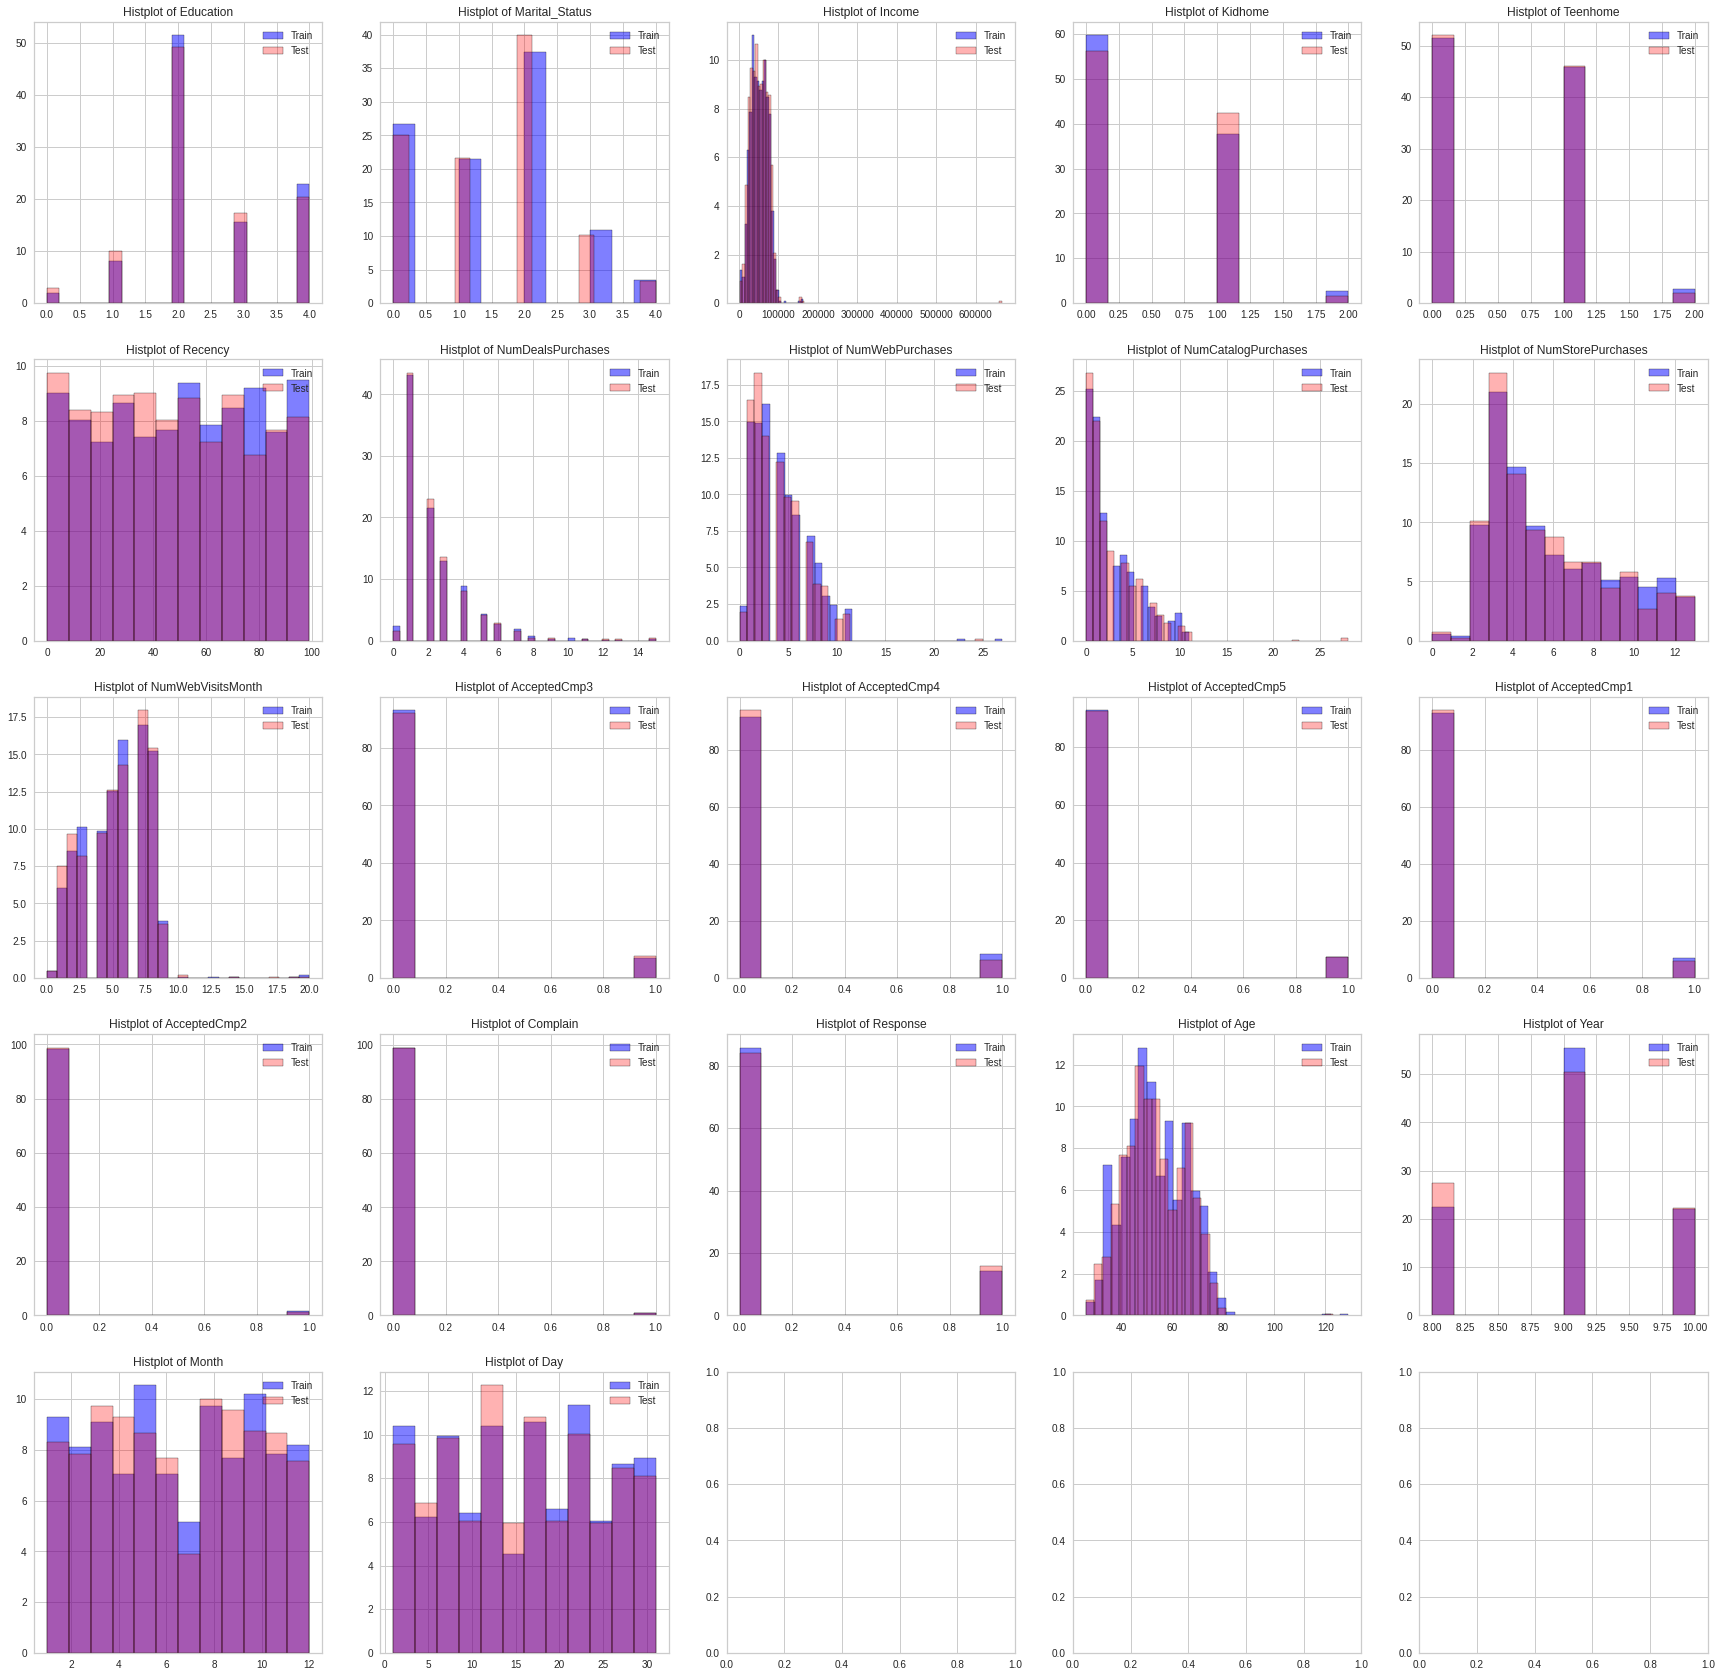

In [31]:
# percent = sum은 막대들의 높이의 합이 100이 되도록 하는 것
# 양의 왜도를 지니는 데이터들도 상당히 많이 보인다.
fit, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (30, 30))

column_list = train.columns.drop('target')

for index, column in enumerate(column_list):
    
    row = index // 5
    col = index % 5
    
    # Train data
    sns.histplot(x = column, data = train, stat = "percent", color = "blue", alpha = 0.5, label = "Train", ax = axes[row][col])
    
    # Test data
    sns.histplot(x = column, data = test, stat = "percent", color = "red", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout()

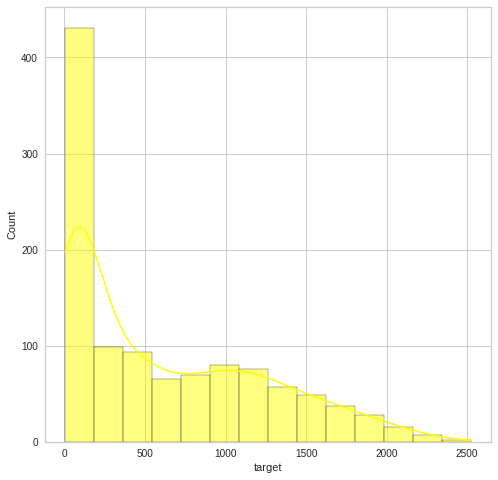

In [32]:
# target 값의 분포는 다음과 같다. 양의 왜도를 띄는 데이터이다
# 0의 개수도 상당히 많다
plt.figure(figsize=(8,8))
sns.histplot(x='target', data=train, color='yellow', kde=True)

#### 스케일링

In [33]:
# 일단 scaling 사용해서 scaling을 해보도록 한다. 이상치들이 많기 때문에 RobustScaler를 사용해보기로 한다.
X_train = train.drop('target', axis=1)
y_train = train['target']
X_test = test

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
train_scaled = train.copy()
train_scaled[train.columns.drop('target')] = X_train

test_scaled = pd.DataFrame(X_test, columns=train.columns.drop('target'))

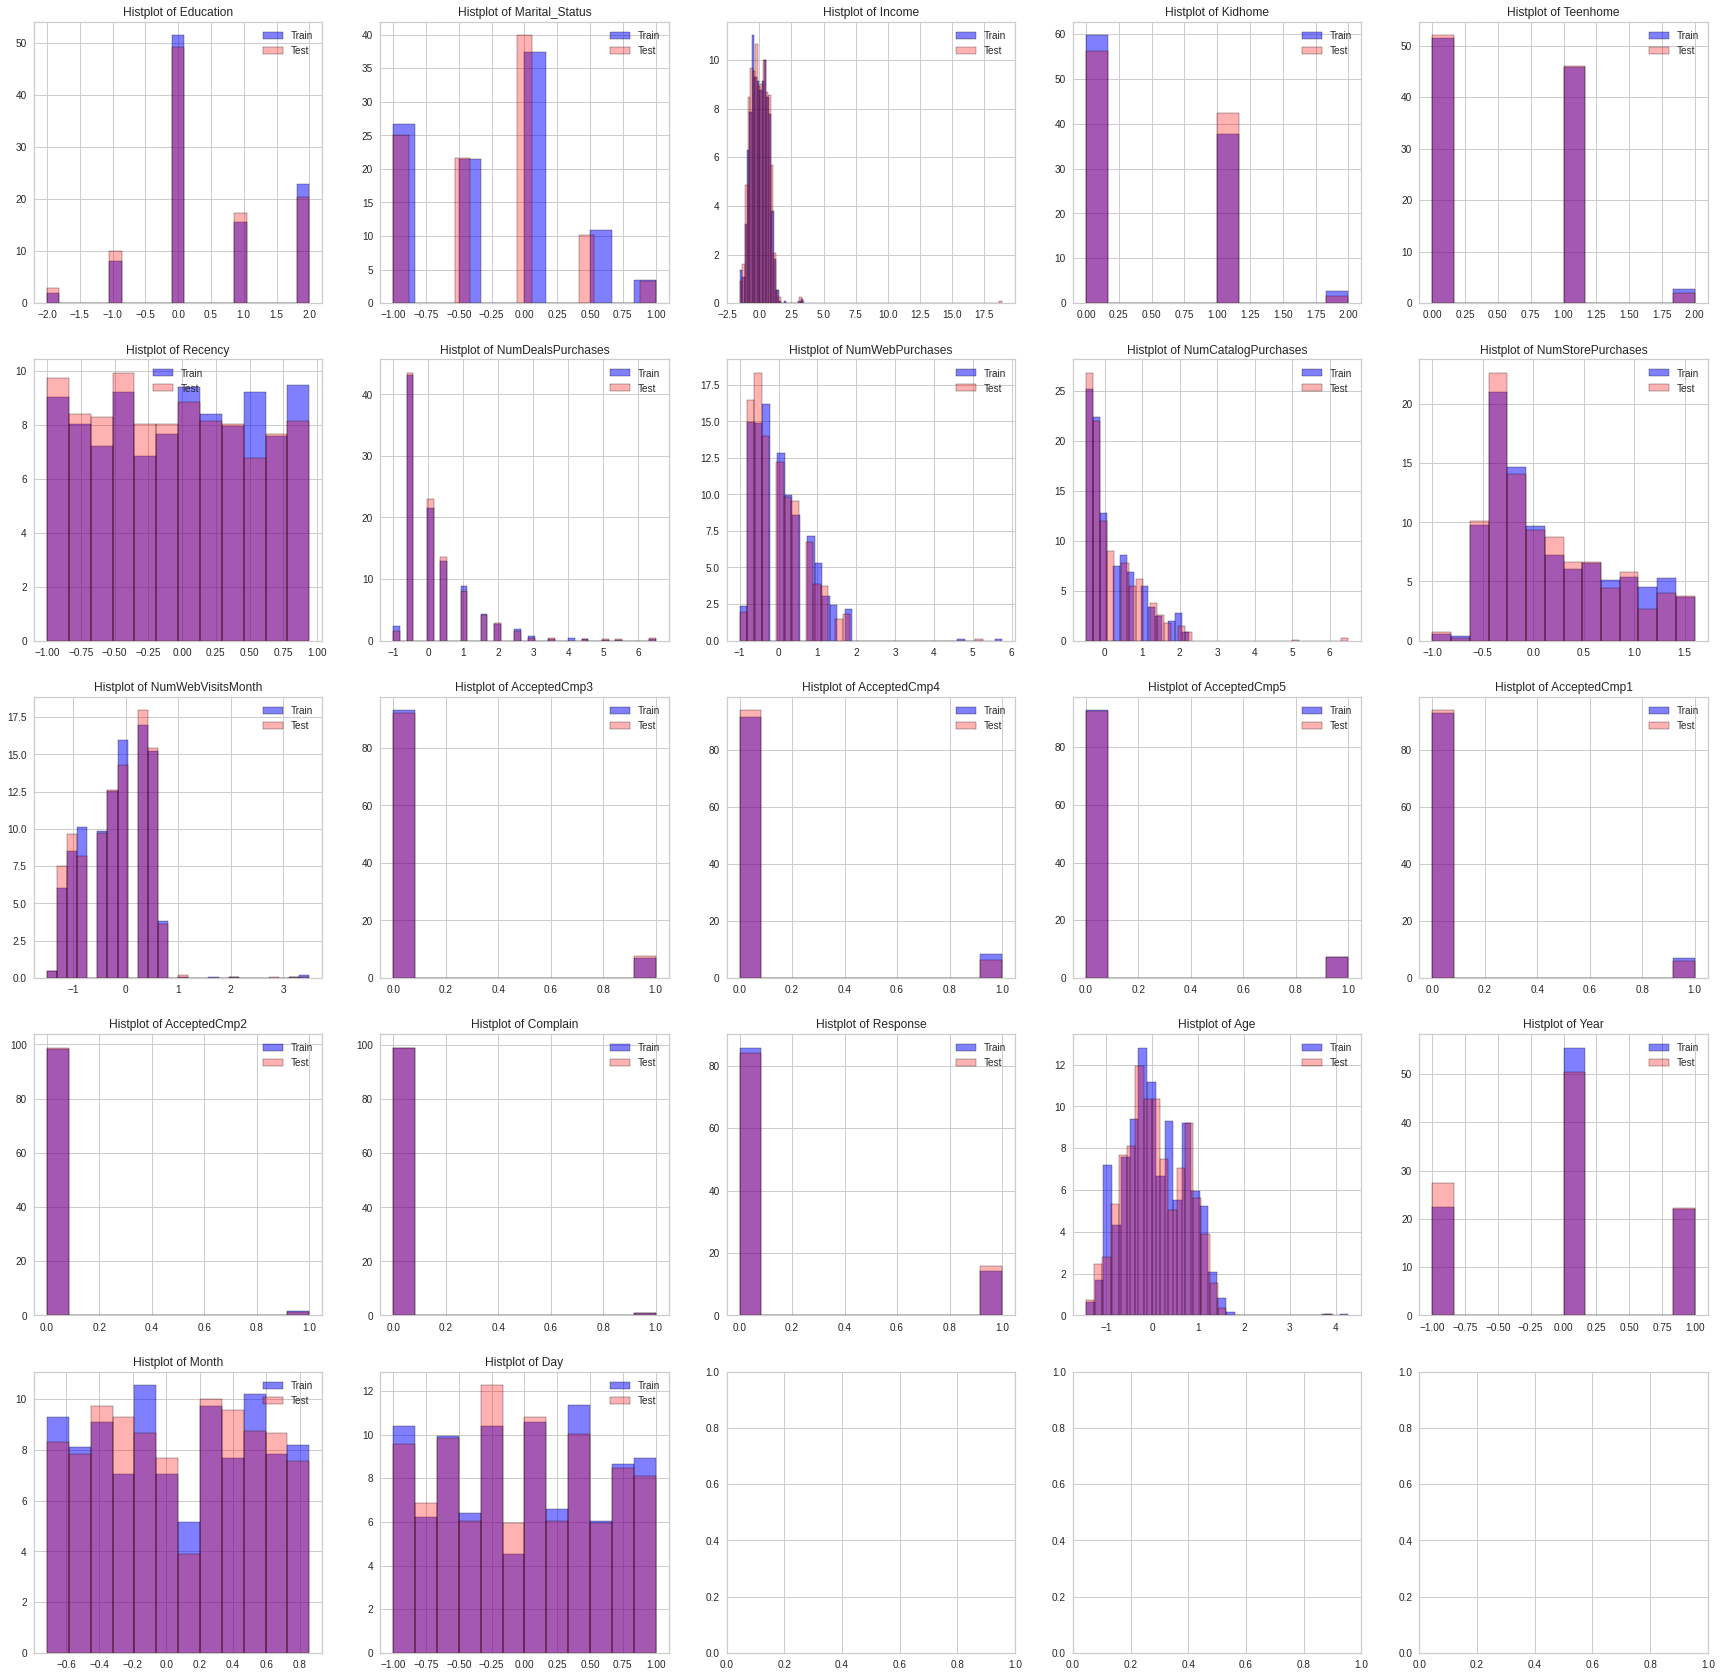

In [35]:
# 다시 히스토그램을 그려보면 아래와 같다
fit, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (30, 30))

column_list = train.columns.drop('target')

for index, column in enumerate(column_list):
    
    row = index // 5
    col = index % 5
    
    # Train data
    sns.histplot(x = column, data = train_scaled, stat = "percent", color = "blue", alpha = 0.5, label = "Train", ax = axes[row][col])
    
    # Test data
    sns.histplot(x = column, data = test_scaled, stat = "percent", color = "red", alpha = 0.3, label = "Test", ax = axes[row][col])
    
    axes[row][col].set_title("Histplot of {}".format(column))
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")
    axes[row][col].legend()
    
fig.tight_layout()

## 모델 사용하기

### pycaret 사용하기

#### pycaret 설치하기

In [35]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install pycaret

     |████████████████████████████████| 320 kB 15.6 MB/s 
     |████████████████████████████████| 2.0 MB 37.3 MB/s 
     |████████████████████████████████| 88 kB 8.5 MB/s 
     |████████████████████████████████| 118 kB 56.2 MB/s 
     |████████████████████████████████| 167 kB 43.7 MB/s 
     |████████████████████████████████| 262 kB 44.0 MB/s 
     |████████████████████████████████| 16.8 MB 56.5 MB/s 
     |████████████████████████████████| 1.3 MB 54.0 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 1.7 MB 57.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 45.7 MB/s 
     |████████████████████████████████| 4.7 MB 43.5 MB/s 
     |████████████████████████████████| 10.9 MB 56.7 MB/s 
     |████████████████████████████████| 636 kB 43.3 MB/s 
     |███████████████

In [1]:
# 위의 코드들을 통해 설치를 한 후, 런타임을 다시 시작해줘야 한다
import jinja2

In [2]:
import pandas as pd
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#### pycaret 사용해보기

In [36]:
# 이미 전처리를 했기 때문에 따로 설정해 주지는 않는다.
setup_regressor = setup(data=train_scaled, target='target', session_id=100)

,Description,Value
0,session_id,100
1,Target,target
2,Original Data,"(1108, 23)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(775, 22)"


In [37]:
# create_model을 사용해서 randomforest모델을 만들고, 그 성능을 평가해본다(cv=5)
rf = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,127.8719,51402.4862,226.7212,0.8575,0.4532,0.6345
1,129.7308,51659.5811,227.2874,0.8246,0.3675,0.2854
2,148.4032,62629.2483,250.2584,0.8540,0.2942,0.2400
3,100.8862,38922.8210,197.2887,0.8707,0.3504,0.3272
4,142.0305,54975.2990,234.4681,0.8524,0.2827,0.2461
Mean,129.7845,51917.8871,227.2048,0.8518,0.3496,0.3466
Std,16.3425,7658.7875,17.2014,0.0151,0.0610,0.1473


In [38]:
# Compare_model을 사용해, 그 성능을 평가해보고, 상위 5개 모델을 선정해본다(MAE기준, cv=5)
# MAE기준 상위 5개의 모델은(etc, rf, lgb, gbm, knn)
models = compare_models(sort='MAE', fold=5, n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,123.5081,49765.4972,222.4953,0.8576,0.3203,0.2741,0.574
rf,Random Forest Regressor,129.7845,51917.8871,227.2048,0.8518,0.3496,0.3466,0.672
gbr,Gradient Boosting Regressor,134.0946,50753.8427,224.7329,0.8542,0.4526,0.4034,0.122
lightgbm,Light Gradient Boosting Machine,135.5769,55266.5163,234.2903,0.8408,0.4089,0.3983,0.112
knn,K Neighbors Regressor,168.6330,74922.7951,273.0185,0.7859,0.5572,0.7119,0.074
huber,Huber Regressor,171.0961,79901.5427,281.3501,0.7731,0.6423,0.7426,0.042
par,Passive Aggressive Regressor,174.3042,81045.0680,283.6022,0.7693,0.7113,0.7501,0.016
dt,Decision Tree Regressor,176.4026,103429.0194,319.6314,0.7000,0.4377,0.3538,0.018
lasso,Lasso Regression,180.1038,72860.0766,269.0222,0.7920,0.7701,1.1096,0.014
llar,Lasso Least Angle Regression,180.7647,74835.4802,272.6277,0.7870,0.6386,0.9499,0.016


In [39]:
# tune_model을 사용해 HP Tuning을 진행해준다.
tuned_models = [tune_model(i, optimize='MAE',fold=5) for i in models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,155.0429,66449.5723,257.7781,0.8158,0.5155,0.5523
1,148.3788,66271.1928,257.4319,0.7750,0.4695,0.4309
2,185.6502,93505.0184,305.7859,0.7820,0.4302,0.3814
3,123.3590,45916.5502,214.2815,0.8475,0.4813,0.4973
4,143.8710,57049.7537,238.8509,0.8468,0.4052,0.3622
Mean,151.2604,65838.4175,254.8257,0.8134,0.4603,0.4448
Std,20.1909,15748.7969,30.0382,0.0308,0.0387,0.0712


In [40]:
# 튜닝된 결과는 다음과 같다
print(tuned_models)

[ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                    max_depth=11, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.4,
                    min_impurity_split=None, min_samples_leaf=3,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=210, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.2,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=100, verbose=0, warm_start=False), GradientBoostingRegressor(alpha=0.9

In [41]:
# blend_model을 사용해 blending을 진행해준다.
blending = blend_models(estimator_list=tuned_models, fold=5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,130.5518,49722.9117,222.9863,0.8622,0.4529,0.5399
1,129.6454,51079.7723,226.0083,0.8266,0.3416,0.2834
2,152.8009,64523.4782,254.0147,0.8496,0.3253,0.2734
3,97.2611,31848.7823,178.4623,0.8942,0.3608,0.3375
4,135.1362,51698.7723,227.3736,0.8612,0.3221,0.2889
Mean,129.0791,49774.7434,221.7691,0.8587,0.3605,0.3446
Std,17.9682,10433.3402,24.3562,0.0219,0.0482,0.1001


In [42]:
print(blending)

VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                                 criterion='mae', max_depth=11,
                                                 max_features=1.0,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.4,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=3,
                                                 min_samples_split=7,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=210, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=100, verbos...
            

In [43]:
# 모델을 finalize하고, 예측을 진행함
final_model = finalize_model(blending)
prediction = predict_model(final_model, data=test_scaled)

In [44]:
prediction = prediction['Label']

In [45]:
prediction = prediction.apply(lambda x: 0 if x<0 else x)

In [46]:
print(prediction)

0        541.970880
1        856.044590
2        735.921656
3       1049.970678
4       1407.118434
           ...     
1103      74.831069
1104      27.529039
1105      66.945538
1106    1045.319337
1107     152.876563
Name: Label, Length: 1108, dtype: float64


## 제출파일 생성하기

In [47]:
submission = pd.read_csv('sample_submission (2).csv')

In [48]:
submission['target'] = prediction

In [49]:
print(submission)

        id       target
0        0   541.970880
1        1   856.044590
2        2   735.921656
3        3  1049.970678
4        4  1407.118434
...    ...          ...
1103  1103    74.831069
1104  1104    27.529039
1105  1105    66.945538
1106  1106  1045.319337
1107  1107   152.876563

[1108 rows x 2 columns]


In [50]:
submission.to_csv('pycaret1.csv', index=False)